In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [ ]:
filename = "reviewrestoransteak_tanpa_preprocessing (1).csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,name_restoran_steak,name,rating,review
0,Steak Hotel by HOLYCOW! TKP Semarang,Nirmala Hidajati,5.0,The best steak house that I ever eaten. I orde...
1,Steak Hotel by HOLYCOW! TKP Semarang,Chendy Christian,4.0,They didn't provide some mustard and other thi...
2,Steak Hotel by HOLYCOW! TKP Semarang,Arno âRockerss07â Febrianto,5.0,"Great place for family dinners, medium price. ..."
3,Steak Hotel by HOLYCOW! TKP Semarang,Kiki Maliana,4.0,"One of famous steak house in Semarang, have a ..."
4,Steak Hotel by HOLYCOW! TKP Semarang,Ignasius Bagus Satrio Suhardiyono,4.0,$$$$ Price range: around IDR 25k - 250k 5 ð...
...,...,...,...,...
95,Steak Hotel by HOLYCOW! TKP Semarang,Obed M,5.0,ahhh mantaff.. best ever steak in town
96,Steak Hotel by HOLYCOW! TKP Semarang,Sylva Syair,5.0,Spacious... good.food...
97,Steak Hotel by HOLYCOW! TKP Semarang,Neni Wardana,5.0,The best steak in town! Its pricey but worthed...
98,Steak Hotel by HOLYCOW! TKP Semarang,Liya Aryati,3.0,"The ambience is nice, the steak is okay"


In [ ]:
df.drop(columns = ['name_restoran_steak','name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,5.0,The best steak house that I ever eaten. I orde...
1,4.0,They didn't provide some mustard and other thi...
2,5.0,"Great place for family dinners, medium price. ..."
3,4.0,"One of famous steak house in Semarang, have a ..."
4,4.0,$$$$ Price range: around IDR 25k - 250k 5 ð...


Preprocessing Data

Cleaning The Text

In [ ]:
import string
import re

In [ ]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [ ]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,5.0,The best steak house that I ever eaten. I orde...,the best steak house that i ever eaten i orde...,1,304,3.0
1,4.0,They didn't provide some mustard and other thi...,they didn t provide some mustard and other thi...,1,62,4.8
2,5.0,"Great place for family dinners, medium price. ...",great place for family dinners medium price ...,1,165,4.2
3,4.0,"One of famous steak house in Semarang, have a ...",one of famous steak house in semarang have a ...,1,232,3.0
4,4.0,$$$$ Price range: around IDR 25k - 250k 5 ð...,price range around idr k k ...,1,170,7.1
...,...,...,...,...,...,...
95,5.0,ahhh mantaff.. best ever steak in town,ahhh mantaff best ever steak in town,1,32,6.2
96,5.0,Spacious... good.food...,spacious good food,1,23,30.4
97,5.0,The best steak in town! Its pricey but worthed...,the best steak in town its pricey but worthed...,1,53,7.5
98,3.0,"The ambience is nice, the steak is okay",the ambience is nice the steak is okay,0,32,3.1


Tokenization

In [ ]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,5.0,The best steak house that I ever eaten. I orde...,the best steak house that i ever eaten i orde...,1,304,3.0,"[the, best, steak, house, that, i, ever, eaten..."
1,4.0,They didn't provide some mustard and other thi...,they didn t provide some mustard and other thi...,1,62,4.8,"[they, didn, t, provide, some, mustard, and, o..."
2,5.0,"Great place for family dinners, medium price. ...",great place for family dinners medium price ...,1,165,4.2,"[great, place, for, family, dinners, medium, p..."
3,4.0,"One of famous steak house in Semarang, have a ...",one of famous steak house in semarang have a ...,1,232,3.0,"[one, of, famous, steak, house, in, semarang, ..."
4,4.0,$$$$ Price range: around IDR 25k - 250k 5 ð...,price range around idr k k ...,1,170,7.1,"[price, range, around, idr, k, k, for, the, se..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,5.0,The best steak house that I ever eaten. I orde...,the best steak house that i ever eaten i orde...,1,304,3.0,"[the, best, steak, house, that, i, ever, eaten...",best steak house ever eaten ordered rib eye mu...
1,4.0,They didn't provide some mustard and other thi...,they didn t provide some mustard and other thi...,1,62,4.8,"[they, didn, t, provide, some, mustard, and, o...",provide mustard thing sambal sauce
2,5.0,"Great place for family dinners, medium price. ...",great place for family dinners medium price ...,1,165,4.2,"[great, place, for, family, dinners, medium, p...",great place family dinner medium price great s...
3,4.0,"One of famous steak house in Semarang, have a ...",one of famous steak house in semarang have a ...,1,232,3.0,"[one, of, famous, steak, house, in, semarang, ...",one famous steak house semarang cozy place man...
4,4.0,$$$$ Price range: around IDR 25k - 250k 5 ð...,price range around idr k k ...,1,170,7.1,"[price, range, around, idr, k, k, for, the, se...",price range around idr k k service taste hospi...


EDA

In [ ]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 100 rows and 8 columns
Rating 1.0 = 5 rows
Rating 2.0 = 1 rows
Rating 3.0 = 8 rows
Rating 4.0 = 27 rows
Rating 5.0 = 59 rows


Number of null in label: 0
Number of null in text: 0


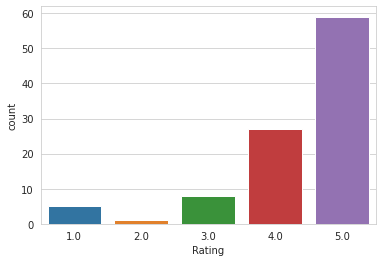

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


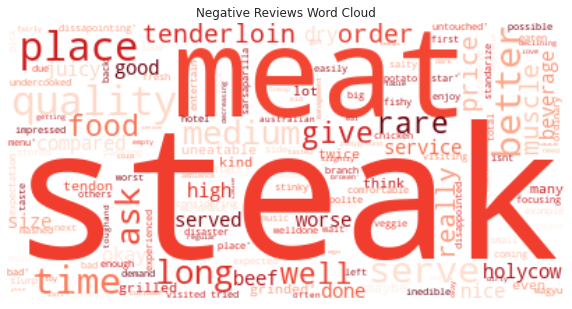

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

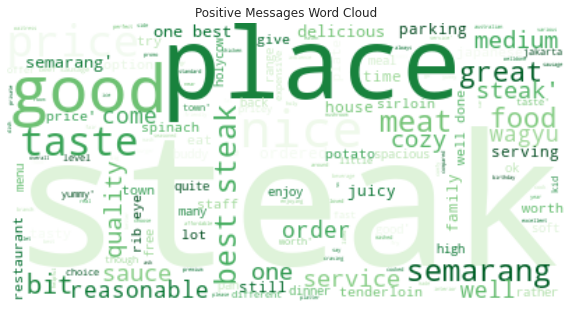

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [ ]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(30, 3)
(70,)
(30,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,28,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.635077,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.341529,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.543394,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.429834,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.312523,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349032,0.0,0.0,0.0,0.0,0.242905,0.0,0.0,0.0,0.0,0.0,0.0,0.187701,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.374935,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.374935,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.257947,0.0,0.0,0.0,0.276015,0.0,0.0,0.0,0.0,0.0,0.349032,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.374935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.506335,0.0,0.0,0.0,0.0,0.0,0.0,0.782523,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.362329,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,173,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16025,0.0,0.0,0.000000,0.0,0.0,0.267978,0.267978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.536624,0.0,0.0,0.267978,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.223371,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.204857,0.0,0.0,0.0,0.0,0.0,0.498929,0.0,0.124236,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.223371,0.0,0.0,0.0,0.190497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168843,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Training different Classification models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



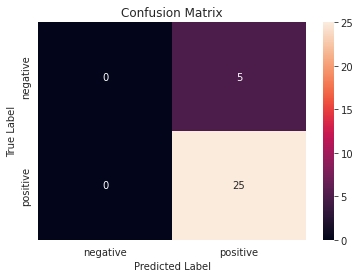

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



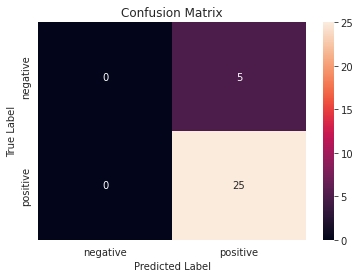

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



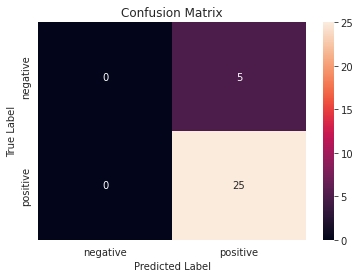

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



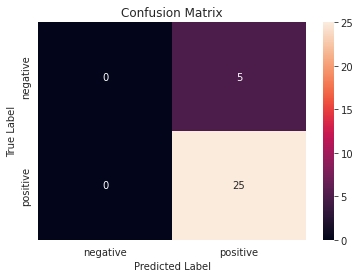

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



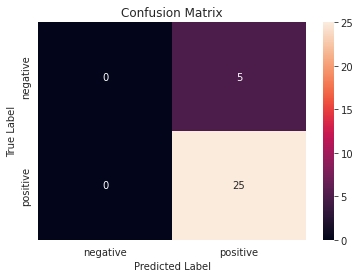

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



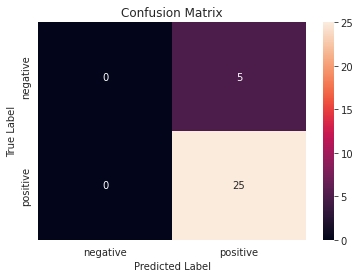

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [ ]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.8714285714285713 
 precision - 0.8714285714285713 
 recall - 1.0 
 f1 - 0.9307692307692308 

Logistic Regression
 accuracy - 0.8714285714285713 
 precision - 0.8714285714285713 
 recall - 1.0 
 f1 - 0.9307692307692308 

Random Forest
 accuracy - 0.8714285714285713 
 precision - 0.8714285714285713 
 recall - 1.0 
 f1 - 0.9307692307692308 

SVM
 accuracy - 0.8714285714285713 
 precision - 0.8714285714285713 
 recall - 1.0 
 f1 - 0.9307692307692308 

KNN
 accuracy - 0.8428571428571427 
 precision - 0.8666666666666666 
 recall - 0.9666666666666668 
 f1 - 0.9128205128205128 

Extra Trees
 accuracy - 0.8714285714285713 
 precision - 0.8833333333333332 
 recall - 0.9833333333333334 
 f1 - 0.9294871794871794 



prediction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8

In [ ]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 1 0 1]
